Normal bir veriseti nazaran bir text veri setiyle çalışmak ve bu veri setinde Keşifsel Veri Analizi (EDA) yapmak için farklı teknikler barındırır.


Temel kullanabilecek teknikler: 

*Counts and Lengths: Karakter sayılarına, kelime sayılarına, cümle sayılarına ve dize sayıları yanı sıra ortalama kelime ve cümle uzunlukları da bakacağız.

*Term Frequency Analysis:
En sık kullanılan kelimeleri, n-gram'ları ve  kelime bulutlarına neden ihtiyaç duymadığımızı tartışacağız.

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')

import re
import string


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mete_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mete_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
data=pd.read_csv('students.csv')

data.head(10)

,Genre,Reports,Age,Gpa,Year,Count,Gender
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,1,M
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,1,F
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,1,F
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,1,F
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,1,F
5,Academic Support and Resources,The grading system in this course is unfair a...,22,2.79,2,1,F
6,Academic Support and Resources,I wish my professor would give us more feedba...,24,3.50,2,1,F
7,Academic Support and Resources,The quality of teaching in this course is ver...,20,1.11,2,1,M
8,Academic Support and Resources,The course fees and textbook costs are way to...,24,3.26,2,1,F
9,Academic Support and Resources,I am very concerned about academic dishonesty ...,25,0.86,2,1,F


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genre    1005 non-null   object 
 1   Reports  1005 non-null   object 
 2   Age      1005 non-null   int64  
 3   Gpa      1005 non-null   float64
 4   Year     1005 non-null   int64  
 5   Count    1005 non-null   int64  
 6   Gender   1005 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 55.1+ KB


In [39]:
data.dtypes.value_counts()

object     3
int64      3
float64    1
dtype: int64

#### Fundamentals of text 

In [40]:
# ilk olarak veri setinden bir cümle alalım ve bunu teker teker inceleyelim.

cumle=data['Reports'][0]
cumle

'The limited access to research databases and materials is causing a lot of frustration among students. We need better access to be able to succeed academically.'

In [41]:
#karakter sayımı
char_count=len(cumle)
print(char_count)

160


In [42]:
#kelime sayımı.
word_count=len(cumle.split())
print(f'{word_count} tane kelime bulunmaktadır')


26 tane kelime bulunmaktadır


In [43]:
#cümle sayımı
sent_count=len(sent_tokenize(cumle))
print(f'bu değerlendirmede {sent_count} tane cumle bulunmaktadır.')


bu değerlendirmede 2 tane cumle bulunmaktadır.


In [44]:
#Şimdi de veri setinde ortalama kaç kelime uzunluğu ?

ort_kel_uzu=np.mean([len(x) for x in str(data['Reports']).split()])

print(ort_kel_uzu)


4.281818181818182


In [45]:
#Veri setindeki tüm cümlelerin ortalama uzunluğu
ort_cumle_uzunlugu=np.mean([len(i) for i in sent_tokenize(str(data['Reports']))])

print(ort_cumle_uzunlugu)

96.28571428571429


## Tüm veri setine uygulama

In [46]:
#Kelime sayımı için
data['kelime_sayısı']=data['Reports'].map(lambda x: len(x.split()))

#Cümle sayımı için 
data['cumle_sayısı']= data['Reports'].map(lambda x : len(sent_tokenize(x)))

#ortalama kelime sayısı için
data['ortalama_kelime_uzunlugu']=data['Reports'].map(lambda x:np.mean([len(x) for x in str(x).split()]))

#ortalama cumle sayısı için
data['ortalama_cumle_uzunlugu']=data['Reports'].map(lambda x : np.mean([len(i) for i in sent_tokenize(str(x))]))

In [47]:
data.head()

,Genre,Reports,Age,Gpa,Year,Count,Gender,kelime_sayısı,cumle_sayısı,ortalama_kelime_uzunlugu,ortalama_cumle_uzunlugu
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,1,M,26,2,5.192308,79.5
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,1,F,24,2,4.791667,68.5
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,1,F,35,2,4.685714,98.5
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,1,F,31,2,4.354839,82.0
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,1,F,24,2,4.833333,69.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x1000 with 0 Axes>

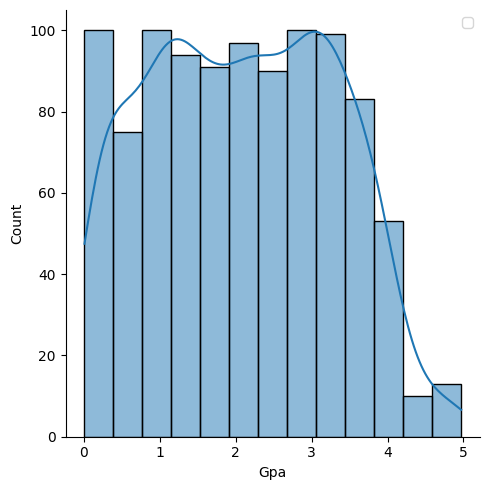

In [48]:
#Not ortalamasını görselleştirelim.

plt.figure(figsize=(10,10))

sns.displot(data=data['Gpa'],kde=True)

plt.legend()
plt.show()

In [49]:
#şimdi not ortalamarını belli bir scala'ya oturtulup yönelimleri inceleyelim.

def groupOfGpa(x):

    if 0<x<1:
        return '0-1'
    elif 1<x<2:
        return '1-2'
    elif 2<x<3:
        return '2-3'
    elif 3<x<4:
        return '3-4'
    else:
        return '4-5'

data['Gpa']=data['Gpa'].apply(groupOfGpa)

In [50]:
data.sample(2)

,Genre,Reports,Age,Gpa,Year,Count,Gender,kelime_sayısı,cumle_sayısı,ortalama_kelime_uzunlugu,ortalama_cumle_uzunlugu
347,Career opportunities,The lack of available internships and job oppo...,25,3-4,5,1,F,16,1,5.250000,99.0
112,Academic Support and Resources,The limited access to technology and software ...,27,0-1,1,1,F,21,1,4.857143,122.0


<Axes: xlabel='ortalama_cumle_uzunlugu', ylabel='Gpa'>

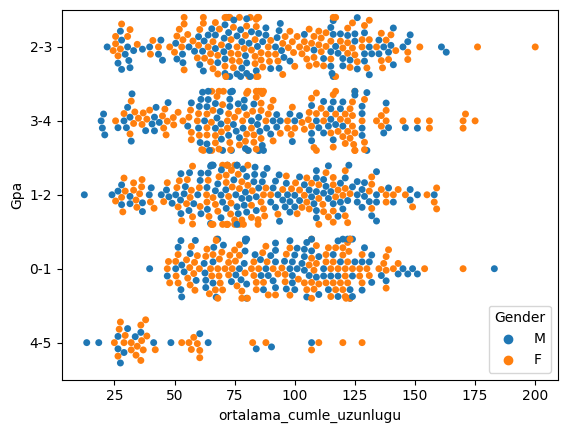

In [51]:
#Hadi görselleştirelim.

sns.swarmplot(data=data,x='ortalama_cumle_uzunlugu',y='Gpa',hue='Gender')

### Term Frequency Analysis

Bu, bir kelime bulutu kullanmak isteyebileceğiniz kısımdır. Lütfen kullanmayın. Başlamadan önce, her şeyi küçük harfe çevirerek ve tüm noktalama işaretlerini ve Latin olmayan karakterleri kaldırarak metni önceden işlememiz gerekir.


In [52]:
def clean_text(x):

    #küçük harfler
    x=x.lower()

    #noktalamaları kaldırma
    x=re.sub('[%s]' % re.escape(string.punctuation),"",x)

    #Latin alfabesi olmayanı harfleri kaldırma
    x=re.sub("([^\x00-\x7F])+","",x)

    return x 

data['clean_report']=data["Reports"].apply(clean_text)

In [53]:
#Stopword kullanımı

stop=set(stopwords.words('english'))

corpus=[word for i in data['clean_report'].str.split().values.tolist() for word in i if (word not in stop)]

print(corpus)

['limited', 'access', 'research', 'databases', 'materials', 'causing', 'lot', 'frustration', 'among', 'students', 'need', 'better', 'access', 'able', 'succeed', 'academically', 'im', 'trouble', 'finding', 'course', 'materials', 'need', 'classes', 'library', 'doesnt', 'bookstore', 'always', 'sold', 'frustrating', 'limited', 'access', 'research', 'databases', 'materials', 'im', 'trying', 'write', 'paper', 'project', 'feel', 'like', 'im', 'disadvantage', 'compared', 'students', 'schools', 'im', 'really', 'struggling', 'one', 'classes', 'cant', 'get', 'appointment', 'academic', 'advisor', 'weeks', 'making', 'feel', 'like', 'one', 'cares', 'success', 'really', 'struggling', 'understanding', 'instructions', 'assignment', 'clear', 'dont', 'know', 'expected', 'grading', 'system', 'course', 'unfair', 'inconsistent', 'seems', 'like', 'professor', 'picking', 'favorites', 'giving', 'everyone', 'fair', 'shot', 'wish', 'professor', 'would', 'give', 'us', 'feedback', 'assignments', 'dont', 'know', 'i

In [54]:
# Şuanda en çok kullanılan sözcükler ile iki seçeneğimiz var.
#FreqDist class ya da Counter class kullanmanız gerecektir.

from nltk.probability import FreqDist

#En çok kullanılan 10 kelime
most_common=FreqDist(corpus).most_common(15)
print(most_common)

[('im', 244), ('students', 233), ('university', 159), ('limited', 127), ('academic', 124), ('like', 123), ('feel', 120), ('options', 113), ('campus', 113), ('access', 111), ('hard', 111), ('opportunities', 110), ('difficult', 107), ('time', 104), ('online', 96)]


In [55]:
words= []
frequency = []
for i,k in most_common:
    words.append(i)
    frequency.append(k)

print(words)
print(frequency)

['im', 'students', 'university', 'limited', 'academic', 'like', 'feel', 'options', 'campus', 'access', 'hard', 'opportunities', 'difficult', 'time', 'online']
[244, 233, 159, 127, 124, 123, 120, 113, 113, 111, 111, 110, 107, 104, 96]


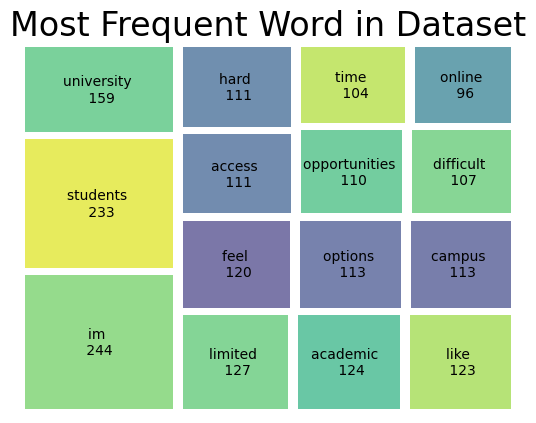

In [60]:
#bir dataFrame oluşturup görselleştirelim.
data=pd.DataFrame(data={'words':words,'frequency':frequency})

#Treemap
label='im \n 244 ', 'students \n 233', 'university \n 159', 'limited \n 127', 'academic  \n 124', 'like \n 123', 'feel \n 120', 'options \n 113', 'campus \n 113', 'access \n 111', 'hard \n 111', 'opportunities \n 110', 'difficult \n 107', 'time \n 104', 'online \n 96'
axis=squarify.plot(sizes=frequency,label=label,alpha=.7,pad=2)
plt.axis('off')
axis.set_title("Most Frequent Word in Dataset", fontsize=24)
plt.show()

In [ ]:
#Done!